In [117]:
library(psych)

# Análisis del suelo de sotobosques de pinos

Descripción de las variables del conjunto de datos:
* Contenido en ppm de diferentes elementos químicos en el suelo de una parcela: N, P, K, Ca, Mg, S, Al, Fe, Mn, Zn, Mo
* Baresoil (Categorica): Cubierta de suelo desnudo (Low, High)
* Humdepth: grosor de la capa de humus (cm).
* pH (Categorica): pH del suelo (Low, Med, High)

Objetivo principal:
* Agrupar las parcelas con aquellas con características similares (Clustering)

In [118]:
# Cargamos los datos
load("vegetal.RData")
df_vegetal <- vegetal

In [119]:
# Un vistazo a la estructura
head(df_vegetal, 2)

,N,P,K,Ca,Mg,S,Al,Fe,Mn,Zn,Mo,Baresoil,Humdepth,pH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,22.3,47.4,165.9,436.1,64.3,42.3,316.5,200.1,28.2,7.2,0.3,Low,1.5,Med
2,31.1,32.3,73.7,219.0,52.5,25.5,304.6,204.4,14.2,2.6,0.5,Low,1.8,High


---
### Análisis univariante y Multivariante

En primer lugar, se calculan los principales estadísticos de tendencia central y de dispersión para cada una de las propiedades de una parcela en este conjunto de datos: 

In [120]:
# Creacion de tabla de estadisticos para variables numericas:

stats_summary <- function(df){
    # Estadisticos a tener en cuenta
    cols <- c('Min.', '1st Qu.', 'Median', 'Mean', '3rd Qu.', 'Max.', 'Sd')
    stats_table <- c()
    for (i in 1:ncol(df)){
        # Agregar el estadistico de la desv. estandar
        colstats <- c( as.vector(summary(df[, i])), sd(df[, i]) )
        stats_table <- rbind(stats_table, colstats)
    }
    # Formatear tabla de estadisticos 
    stats_table <- data.frame(stats_table, row.names = colnames(df))
    colnames(stats_table) <- cols
    stats_table <- round(stats_table, 2)
    return(stats_table)
}

df_numeric <- df_vegetal[, c(1:11, 13)]
stats_table <- stats_summary(df_numeric)
stats_table

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,Sd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N,13.40,18.83,22.05,22.38,26.30,33.1,5.53
P,22.70,32.60,41.50,45.08,57.05,73.5,14.95
K,43.60,127.15,166.60,162.93,205.75,313.8,64.84
Ca,188.50,425.72,518.50,569.66,739.25,1169.7,243.58
Mg,25.70,60.90,75.05,87.46,108.70,209.1,41.01
S,14.90,29.42,36.25,37.19,43.60,60.2,11.67
Al,12.10,38.20,106.80,142.48,233.72,435.1,122.32
Fe,2.30,5.58,27.80,49.61,85.15,204.4,60.45
Mn,10.10,26.70,36.55,49.33,59.00,132.0,33.91


A través de la tabla de estadísticos de las propiedades numéricas sobre el suelo de los sotobosques de pinos en esta muestra se obtiene lo siguiente:
1. En promedio, el elemento químico con mayor concentración en ppm sobre el suelo de las parcelas es el Calcio (Ca). Asimismo, en media se obtuvo que existen parcelas que pueden variar con respecto al centroide en 243.58 ppm, siendo esta el elemento químico con mayor variabilidad. Esto es un indicador que en la muestra tomada de sotobosques de pinos se tienen unas con una concentración de Calcio muy baja como muy alta.

In [121]:
ppm_mean <- stats_table[, "Mean"]
names(ppm_mean) <- colnames(df_numeric)
# Buscar la posicion del elemento quimico con menor y mayor concentracion en ppm
max_ppm <- which.max(ppm_mean)
print("Mayor concentracion en ppm:"); print(ppm_mean[max_ppm])

[1] "Mayor concentracion en ppm:"
    Ca 
569.66 


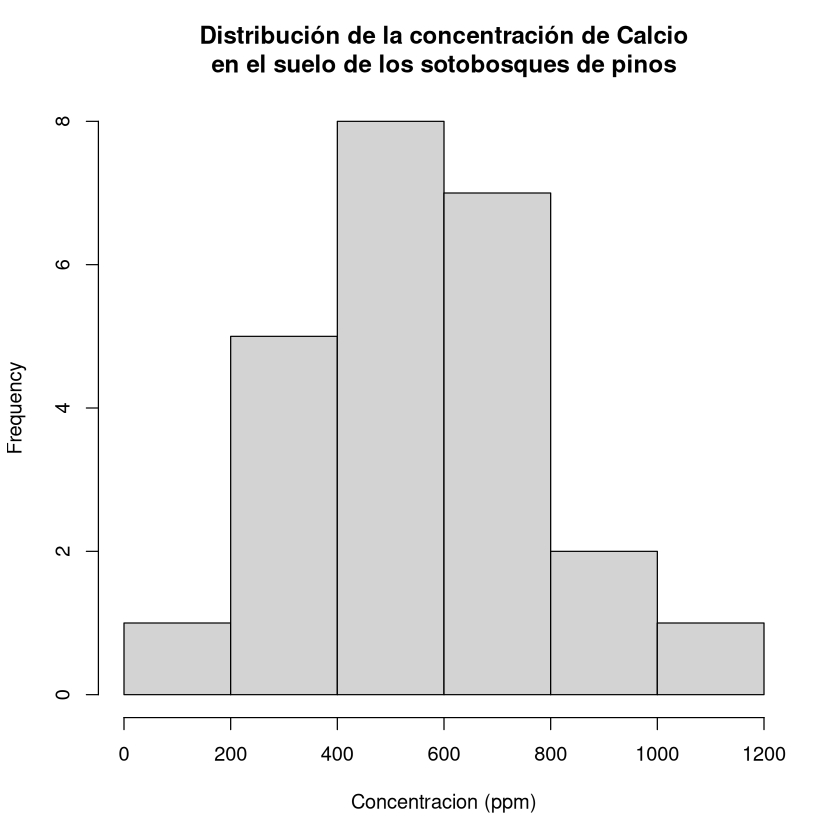

In [122]:
hist(df_numeric$Ca,
     xlab = "Concentracion (ppm)",
     main = "Distribución de la concentración de Calcio\nen el suelo de los sotobosques de pinos")

2. El Molidebno (Mo) es el caso opuesto del Calcio, porque es el elemento químico con menor concentración en ppm en el suelo de los sotobosques de pinos, así como el de menor variabilidad.

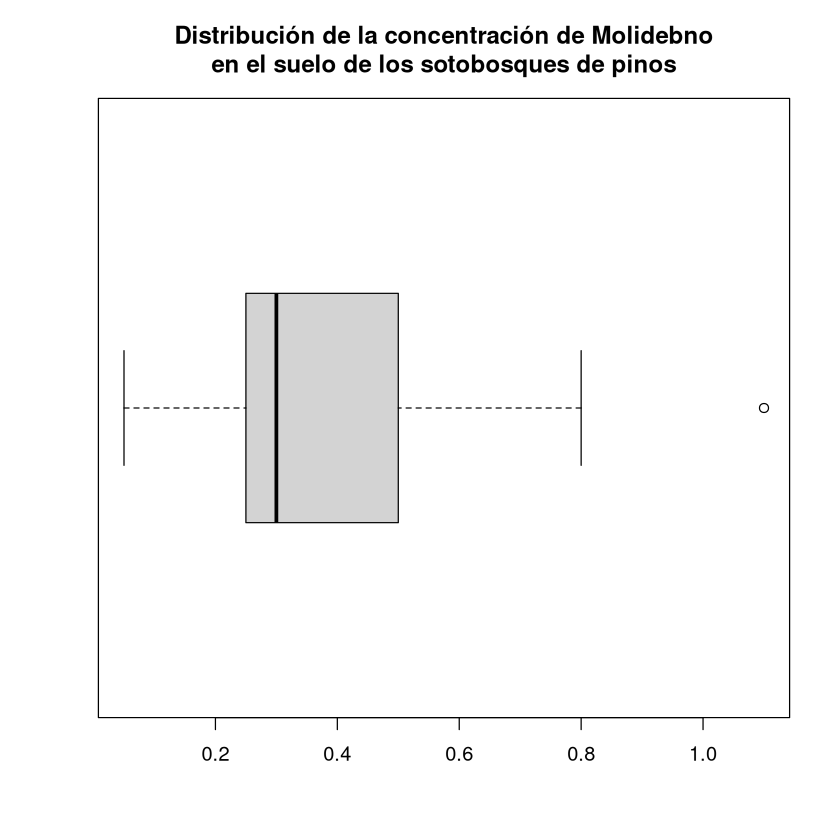

In [123]:
which.min(ppm_mean)
# Distribucion
boxplot(df_numeric[, "Mo"],
        horizontal = T,
        main = "Distribución de la concentración de Molidebno\nen el suelo de los sotobosques de pinos")

In [124]:
# Se observa la presencia de un dato tipico en la muestra
outlier <- df_numeric[which.max(df_numeric$Mo), "Mo"]
sin_outlier <- df_numeric[df_numeric$Mo != outlier, "Mo"]
# Calcular en cuanto se increment la media de la concentracion de Molidebno en el suelo de las parcelas
pct <- round(stats_table["Mo", "Mean"]/mean(sin_outlier) - 1, 2)
cat("La media del Mo se incrementa en un", pct*100, "% (aprox.) debido a la presencia del outlier.")

La media del Mo se incrementa en un 10 % (aprox.) debido a la presencia del outlier.

---

## Nitrogeno (N)

,Media,Mediana,Varianza,Desviacion_Tipica
,<dbl>,<dbl>,<dbl>,<dbl>
N,22.38333,22.05,30.55971,5.528084


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.40   18.82   22.05   22.38   26.30   33.10 

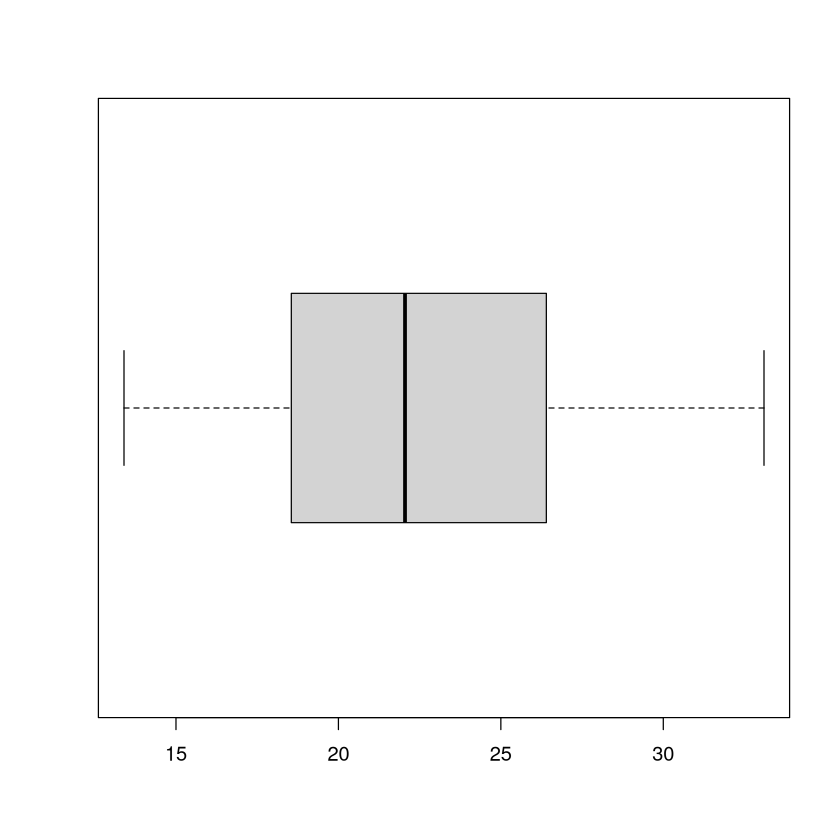

In [125]:
mmvs[1, ]
summary(df_numeric$N)
boxplot(df_numeric$N, horizontal = T)

Podemos observar que los valores de la media y de la mediana apenas difieren, 22.05 y 22.38 . 
Esto es normal ya que tiene unadesviacion tipica no muy alta. No nos encontramos 
con ningun dato atipico y podemos ver que esta bastante biendistribuido.
El valor mas pequeño que nos podemos encontrar es de 13.4 y el mas grande de 33.1 . 
Para terminar, vemos que no esta fuertemente correlacionado con ningun otro elemento.


## Fosforo (P)

In [126]:
mmvs[2, ]

,Media,Mediana,Varianza,Desviacion_Tipica
,<dbl>,<dbl>,<dbl>,<dbl>
P,45.07917,41.5,223.3948,14.9464


Podemos ver que la media y la mediana difieren un poco mas respecto al Nitrogeno, pero aun asi
son muy similares. Nos encontramos con una desviacion tipica mas alta. Vamos a ver como se comporta:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.70   32.60   41.50   45.08   57.05   73.50 

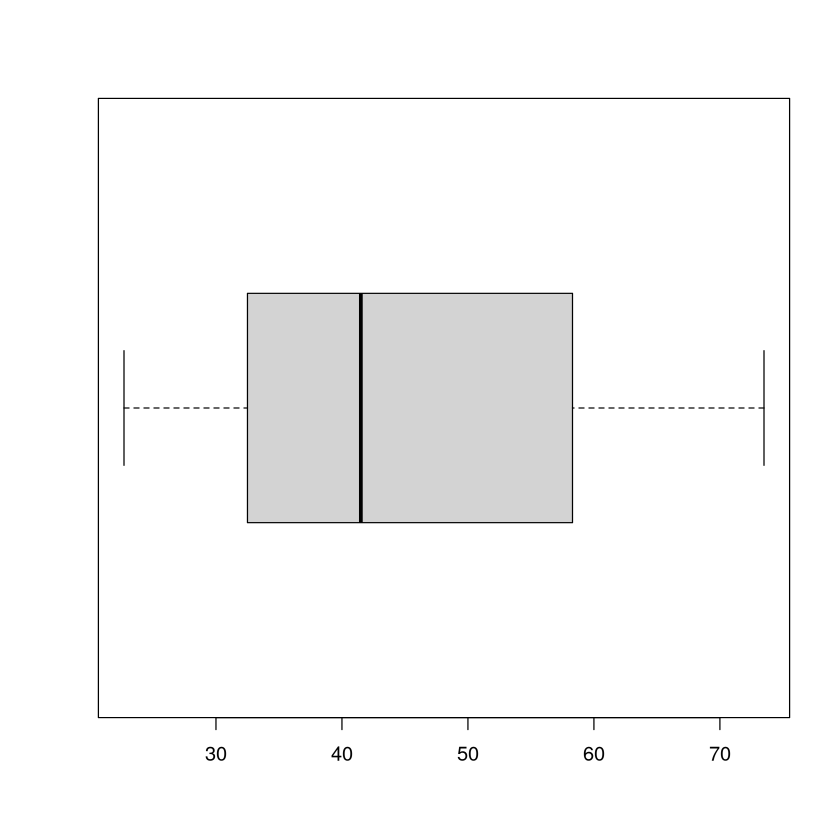

In [127]:
boxplot(df_numeric$P, horizontal =T)
summary(df_numeric$P)

El boxplot muestra que la mediana (41.5 ppm) no está centrada. 
La mitad de los datos está entre (22.7, 41.5) ppm, y la otra entre (41.5, 73.5) ppm, 
con un rango más amplio en el segundo intervalo, existe una mayor dispersion hacia
valores mas altos.
No se observan atipicos

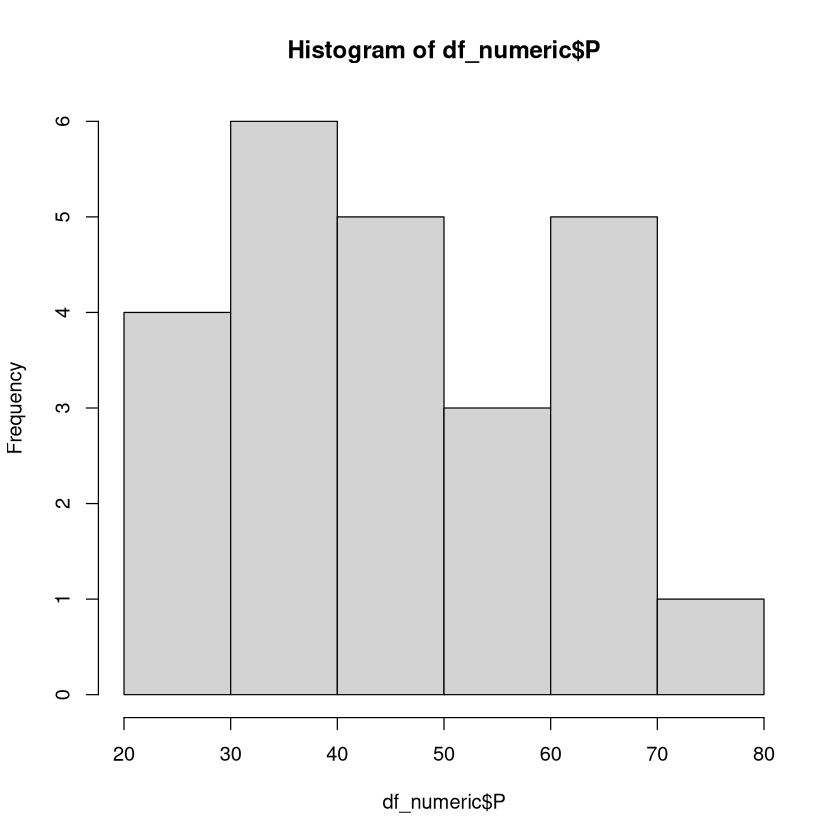

In [128]:
hist(df_numeric$P)

Nos confirma la asimetria, ya que vemos mas valores en los rangos mas bajos.

Ademas, vemos que el fosforo(P) tiene una signitiva correlacion con:
    Potasio--(K)  = 0.75
    Azufre---(s)  = 0.75
    Calcio---(Ca) = 0.74
    Zinc-----(Zn) = 0.70
    Magnesio-(Mg) = 0.6

## Potasio (K)

In [129]:
mmvs[3, ]

,Media,Mediana,Varianza,Desviacion_Tipica
,<dbl>,<dbl>,<dbl>,<dbl>
K,162.9292,166.6,4204.532,64.84236


Podemos ver que la media y la mediana son muy similares. Presenta una 
desviacion tipica relativamente alta, vamos a ver como se comporta:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   43.6   127.2   166.6   162.9   205.8   313.8 

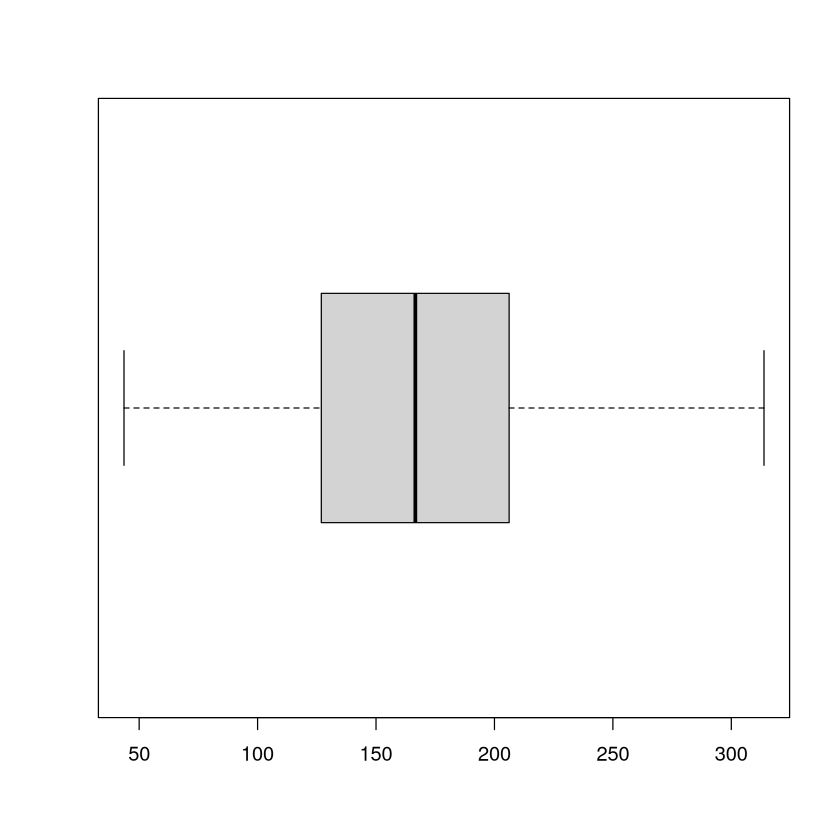

In [130]:
summary(df_numeric$K)
boxplot(df_numeric$K, horizontal=T)

Vemos que la mediana esta centrada entre el 1 y 3 cuartil.
Parece una distribucion equilibrada, sin atipicos.

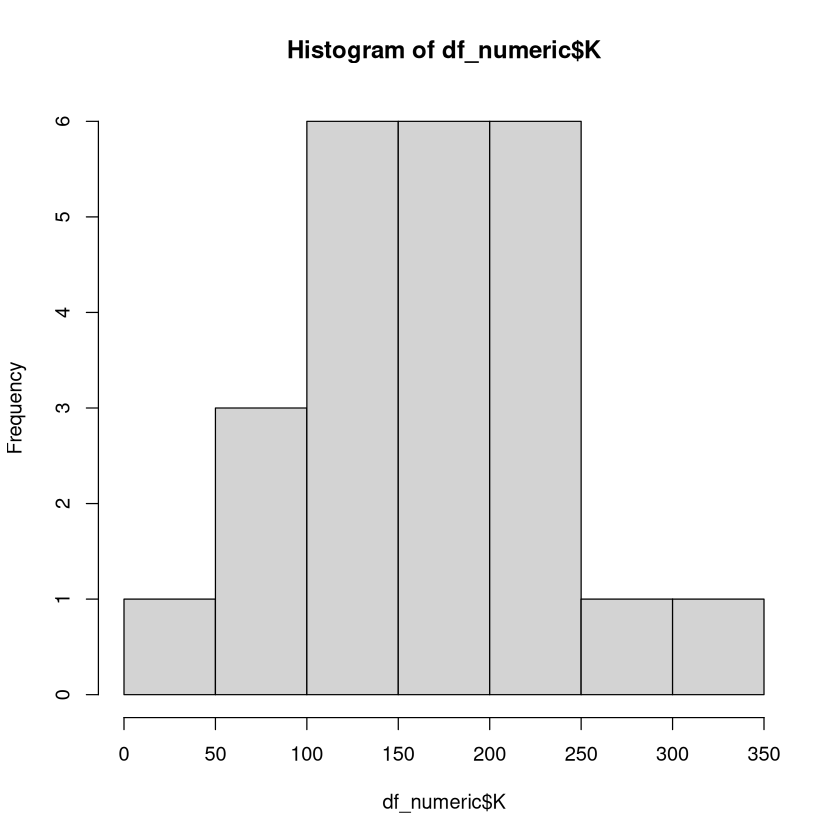

In [131]:
hist(df_numeric$K)

Observamos que todos los valores se encuentran en el centro, siendo muy pocos valores superiores a 250, donde
cae bastante brusco respecto a la otra cola, que tambien hay muchos menos valores, pero cae mas lento antes de 100.

In [132]:
Para terminar, vemos que el potasio esta altamente correlacionado con el:
    Azufre---(S)  = 0.84
    Fosforo--(P)  = 0.75
    Calcio---(Ca) = 0.66
    Magnesio-(Mg) = 0.63
    Zink-----(Zn) = 0.6

ERROR: Error in parse(text = input): <text>:1:6: unexpected symbol
1: Para terminar
         ^


## Calcio (Ca)

In [ ]:
mmvs[4, ]

El calcio presenta una desviacion tipica particularmente grande, aunque la media
tambien sea muy grande comparandola con la del resto de variables (es la mayor de todas)
La media y la mediana difieren bastante, pero es mejor observar primero el boxplot

In [ ]:
summary(df_numeric$Ca)
boxplot(df_numeric$Ca, horizontal=T)

Gracias al boxplot, podemos observar que la mediana esta significativamente apartada del centro 
de los cuartiles 1 y 3. Vemos tambien que la mayoria de los datos se acumulan en un rango pequeño, entre 188.5 y 518.5, mientras que la otra mitad entre 518.5 y 1169.7, teniendo este un rango muy superior.

Ya que el boxplot no esta centrado, vamos a dibujar su histograma para ver mas de cerca su distribucion:

In [ ]:
hist(df_numeric$Ca)

Podemos ver que la mayoria de valores se encuentran entre 200 y 800, y el 
resto se concentran en dos colas. Una cola inferior mas pronunciada, y una cola superior
un poco menos pronunciada que la inferior.

In [ ]:
Para terminar, vemos que el Calcio esta altamente correlacionado con el:
    Magnesio-(Mg) = 0.80
    Fosfoto--(P)  = 0.74
    Zinc-----(Zn) = 0.68
    Potasio--(k)  = 0.66

## Magnesio (Mg)

In [ ]:
mmvs[5, ]

Aqui si se aprecian diferencias entre la media y la mediana, siendo la media 12.41ppm mayor a la mediana. Ademas, presenta una desviacion tipica relativamente grande respecto al valores de la mediana.

In [ ]:
summary(df_numeric$Mg)
boxplot(df_numeric$Mg, horizontal=T)

Al igual que antes, la mediana se encuentra descentrada respecto al 1 y 3 cuartil, teniendo mayor rango los datos entre (75.05, 160(aproximadamente)  )ppm que los datos entre
(25.7, 75.05)ppm.

A diferencia con los otros elementos hasta el momento, nos encontrasmos con un dtao atipico: 209.10, el valor mas alto es un dato atipico en este caso.


In [ ]:
hist(df_numeric$Mg, breaks = 10)

Vemos que ma mayoria de datos entan entre 60 y 80. Sin embargo podemos ver un intervalo entre 40 y 140 que ocupa la mayor parte de los datos. Podemos observar algunos valores entre 25 y 40, y tambien unos pocos enter 140 y 160. 
Se observa con este grafico muy bien el valor atipico en 209.
Podemos decir entonves, que tiene dos colas muy pronunciadas respecto al centro.

In [ ]:
Para terminar, vemos que el Magnesio esta altamente correlacionado con el:
    Calcio--(Ca) = 0.8
    Zinc----(Zn) = 0.71
    Azufre--(S)  = 0.65
    Potasio-(K)  = 0.63
    Fosforo-(P)  = 0.6

## Azufre (S)

In [ ]:
mmvs[6, ]

Del azufre podemos ver que la medi ay la mediana son muy similares, no difieren mucho.
Tambien, la desviacion tipica no es muy grande, vamos a ver como se distribuye:

In [ ]:
summary(df_numeric$S)
boxplot(df_numeric$S, horizontal=T)

Podemos obsevar que la mediana esta bien centrada respecto al los cuartiles 1 y 3, y ambos estan bastante bien centrados. Aun asi, el rango entre el valor minimo y la mediana (14.90, 36.25)ppm es un poco menor entre el la mediana y el mayor maximo (36.25, 60.2)ppm

In [ ]:
hist(df_numeric$S)

Vemos que la mayoria de los datos se concentran en el rango (20, 50)ppm, siendo donde mas en (30, 40)ppm.

Para terminar, vemos que el Azufre esta altamente correlacionado con el:

    Potasio--(K)  = 0.84
    Fosforo--(P)  = 0.75
    Zinc-----(zn) = 0.71
    Magnesio-(Mg) = 0.65

## Aluminio (Al)

In [ ]:
mmvs[7, ]

Podemos ver que la media y la medana estan bastante separados, pero lo que realmente llama la atencio en la gran desviacion tipica que presenta.

In [ ]:
summary(df_numeric$Al)
boxplot(df_numeric$Al, horizontal=T)

Podemos ver que la mediana esta muy a la izquierda, cerca del primer cuartil. Podemos ver que la mitad de los datos se encuentran entre 12.1 y 106.8, lo cual es un rango muy pequeño, viendo que el resto se distribuyen entre 106.8 y 435.1. LLama la atencio que aunque tengamos un valor muy alto comparandolo con la media y la mediana, y ademas teniendo la desviacion tipica que tiene, el dato es completamente nomral, no presenta datos atipicos.
Ya podemos anticipar que la mayoria de los datos van a estar en los primeros valores, y despues va a haber una cola hacia la derecha.

In [ ]:
hist(df_numeric$Al)

Se confirma la hipotesis, tenemos la mayoria de valores en un rango pequeño entre 12.1 y 106.8, y el resto se distribuyen como una cola que decrece lentamente, hata tener su ultimo valor en 435.1 .

In [ ]:
Para terminar, vemos que el Aluminio esta altamente correlacionado con el:
    Hierro (Fe) = 0.82

Con el umbral de 0.6, el aluminio no presenta ninguna otra correlacion importante, aun asi, 
con un umbral de 0.4 podriamos ver :
    
    Manganeso (Mn) = -0.47 Corralado negativamente
    Molibdeno (Mo) = 0.51



## Hierro (Fe)

In [ ]:
mmvs[8, ]

El hierro presenta unas caranteristicas interesantes:
Tiene una mediana muy pequeña, y una media con un valor mucho mas alto que la mediana, pero presenta una desviacion tipica de casi el doble que la mediana. 

In [ ]:
summary(df_numeric$Fe)
boxplot(df_numeric$Fe, horizontal=T)

Vemos que el 50% de los datos esta concentrado en un rango muy pequeño, entre 2.3 y 27.8 ppm, sin embargo, toma valores hasta de hasta 204.4ppm. Por tanto, la primera mitad de los datos estan contenidos en un rango muy pequeño, mientras la segunda mitad estan en un rango mucho mas amplio.
Vamos a ver su distribucion

In [ ]:
hist(df_numeric$Fe)

Vemos como La gran mayoria de valores esta en esa franja (2.3-50).

In [ ]:
Para terminar, vemos que el Hierro esta altamente correlacionado con el:
    Aluminio (K)  = 0.82
    
Con el umbral de 0.6, el Hierro no presenta ninguna otra correlacion importante, aun asi, 
con un umbral de 0.4 podriamos ver:
    
    Manganeso (Mn) = -0.44 correlacionado negativamente

## Manganeso (Mn)

In [ ]:
mmvs[9, ]

Podemos ver que la media y la mediana se presentan separadas, pero sobre todo cabe destacar lo alta que es su desviacion tipica, respecto al valor de la mediana 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.10   26.70   36.55   49.33   59.00  132.00 

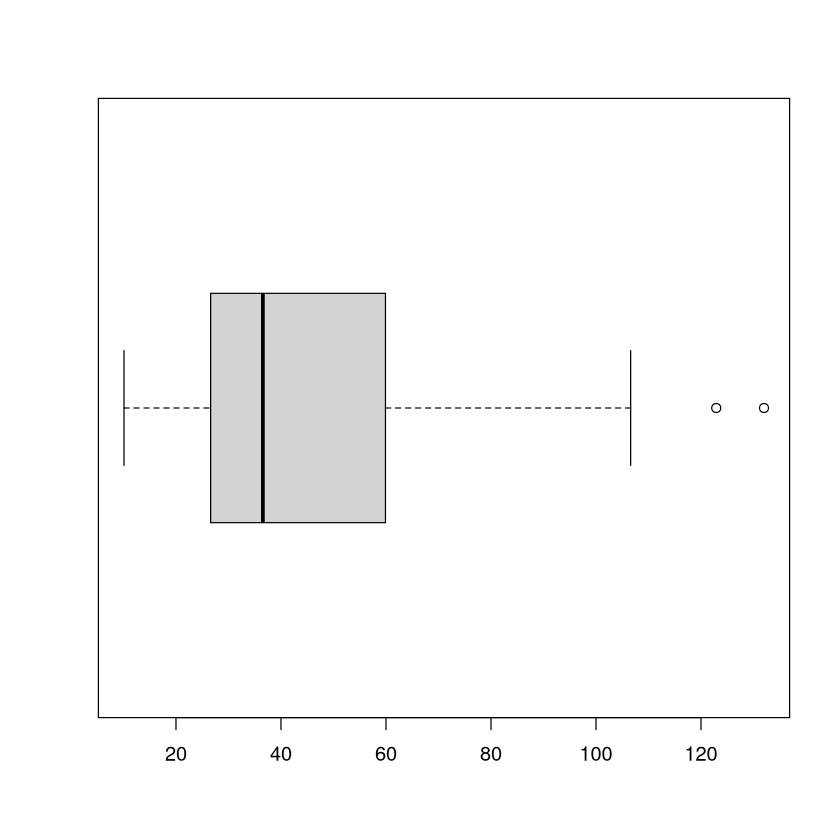

In [134]:
summary(df_numeric$Mn)
boxplot(df_numeric$Mn, horizontal=T)

La media y la mediana se ven separadas, y sobretodo vemos que el 50% de los datos se encuentran en un rango pequeño, entre 10.10 y 36.55 . 
El resto de datos se encuentran en un rango mas grande, entre 36.55 y 107 aproximadamente.
Podemos observar dos valores atipicos, entre ellos el maximo de los datos observados.

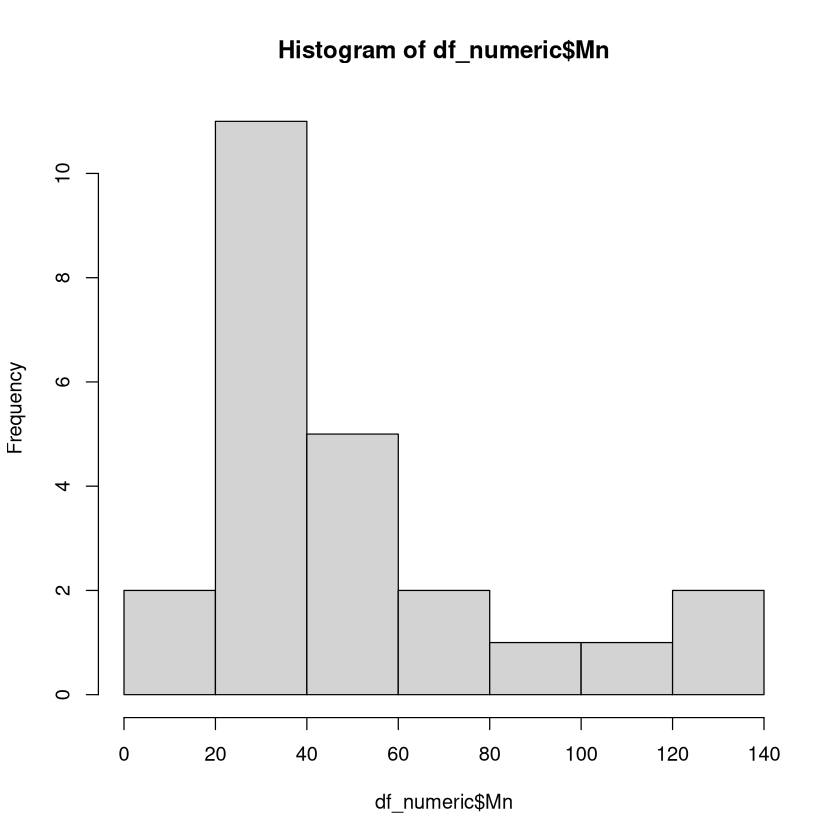

In [133]:
hist(df_numeric$Mn)

Confirmamos que todos la gran mayoria de valores se encuentran entre 20 y 40. De ahi se generan dos colas, una relativamente suave cara los valores altos, y una muy brusca para valores mas pequeños.

In [ ]:
Con un umbral de 0.6 no vemos ninguna correlacion con relevancia, pero si bajamos el umbral 
a 0.5, podemos ver que existen algunas correlaciones:

    Fosforo (P) = 0.54
    Potasio (K) = 0.54
    

## Zink (Zn)

In [ ]:
mmvs[10, ]

Vemos que por lo general el zinc toma valores pequeños.
Podemos supones que la media y la mediana estan relativamente cerca, y que no tiene una desviacion tipica grande.

In [ ]:
summary(df_numeric$Zn)
boxplot(df_numeric$Zn, horizontal=T)

A distincion de todos los elemtos anteriores, en este caso, el 50% de los datos se encuentran concentrados en un rango pequeño con valores mayores a la mediana, y el resto en un rango mucho mayor desde 2.6 a 8.1.
La media esta bastante alejada de la mediana, cosa contraria a lo que supusimos.

In [ ]:
hist(df_numeric$Zn)

Vemos como, por la cola izquierda crece lentamente ya que los datos estan mas repartidos, pero una vez pasa el 8.1, hay una gran cantidad de datos y despues solo hay unos pocos sueltos.

In [ ]:
Para terminar, vemos que el Zinc esta altamente correlacionado con el:
    Magnesio-(Mg) = 0.71
    Azufre (S) = 0.71
    Fosforo--(P)  = 0.7
    Calcio-----(Ca) = 0.68
    Potasio--(K)  = 0.6

## Molibdeno (Mo)

In [ ]:
mmvs[11, ]

In [ ]:
summary(df_numeric$Mo)
boxplot(df_numeric$Mo, horizontal=T)

Observamos como la mediana se encuentra alejada de la media, y como se ve que el 50% de los datos se encuentran en un rango pequeño, entre 0.05 y 0.3, pero que el otro 50% en un rango mas grande, 0.3 a 0.8 aproximadamente.
Podemos observar un dato atipico, en 1.1 que es un valor muy por encima de la media.

El molibdeno no se encuentra correlacionado con ningun otro dato.

In [ ]:
# pairs.panels(df_numeric, smooth = T, density = T, digits = 2, ellipses=T, method='pearson', pch=20, lm=T, cor=T)
# Podemos observar que hay variables muy correladas como puede ser el Calcio y el magnesio
# o por ejemplo el aluminio con el Hierro.
